# Load dataset

In [1]:
!wget https://www.cpe.ku.ac.th/~cnc/customer_data.csv

--2022-07-24 03:52:07--  https://www.cpe.ku.ac.th/~cnc/customer_data.csv
Resolving www.cpe.ku.ac.th (www.cpe.ku.ac.th)... 158.108.32.150
Connecting to www.cpe.ku.ac.th (www.cpe.ku.ac.th)|158.108.32.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 556507 (543K) [application/octet-stream]
Saving to: ‘customer_data.csv’

customer_data.csv   100%[===================>] 543.46K   539KB/s    in 1.0s    

2022-07-24 03:52:10 (539 KB/s) - ‘customer_data.csv’ saved [556507/556507]



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#visualize data
data = pd.read_csv('customer_data.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
print(data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [5]:
labels = data.Segmentation.values
labels

array(['D', 'A', 'B', ..., 'C', 'C', 'A'], dtype=object)

# Perform Label Encoder

In [ ]:
le = LabelEncoder()
data['Segmentation_encode'] = le.fit_transform(data['Segmentation'])
data['Segmentation_encode'] 

In [ ]:
del data['Segmentation'] 

In [ ]:
labels = data.Segmentation_encode.values
labels

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10695.0,NaN,NaN,NaN,463468.08864,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Gender,10695,2,Male,5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,10505,2,Yes,6163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10695.0,NaN,NaN,NaN,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
Graduated,10593,2,Yes,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,10533,9,Artist,3318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,9597.0,NaN,NaN,NaN,2.619777,3.39079,0.0,0.0,1.0,4.0,14.0
Spending_Score,10695,3,Low,6494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,10247.0,NaN,NaN,NaN,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0
Var_1,10587,7,Cat_6,6910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check for segmentation columns
data.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.399574,2.822555,2.571641
B,47.696844,2.397780,2.694705
C,49.260033,2.254480,2.913721
D,34.718864,2.912636,3.166432


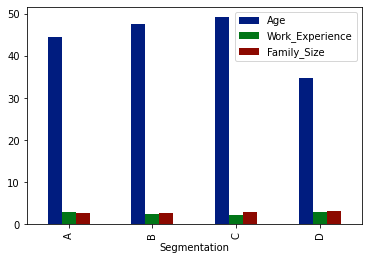

In [8]:
plt.style.use('seaborn-dark-palette')
data.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')

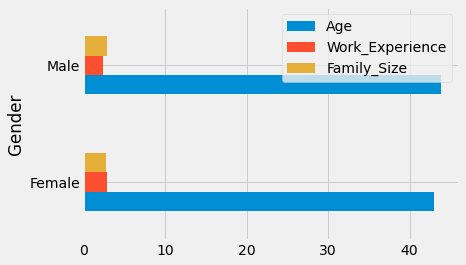

In [9]:
plt.style.use('fivethirtyeight')
data.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'barh')

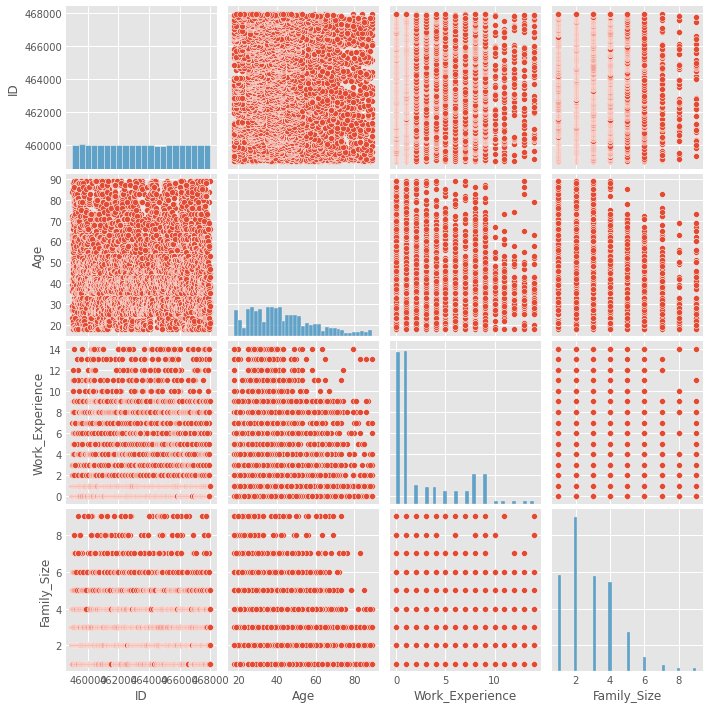

In [10]:
#Checking for correlation
plt.style.use('ggplot')
sns.pairplot(data)

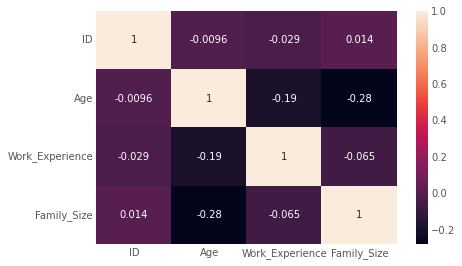

In [11]:
sns.heatmap(data.corr(),annot = True)

# Transform features

In [12]:

features = data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score']]

In [13]:
features.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score
0,Male,No,22,No,Healthcare,1.0,Low
1,Female,Yes,38,Yes,Engineer,NaN,Average
2,Female,Yes,67,Yes,Engineer,1.0,Low
3,Male,Yes,67,Yes,Lawyer,0.0,High
4,Female,Yes,40,Yes,Entertainment,NaN,High


In [ ]:
#Transform the non-numeric columns
features_dummies = pd.get_dummies(features, columns=[ ..FIXME.. ]) 
features_dummies.head(n=16)


In [ ]:
data = features_dummies.values

# Exercise: Create KNN Model

In [ ]:
#Create simple model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#replace missing value

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

train_data, test_data, train_labels, test_labels = ..FIXME ..(data, labels, random_state=456)

 
imp.fit(train_data)
train_data  = imp.transform(train_data)
test_data = imp.transform(test_data)

In [ ]:
#KNN Classifier model
from sklearn.neighbors import KNeighborsClassifier


clf =  .....FIXME.....
clf.fit(train_data , train_labels)

    
print("Prediction accuracy: %f" % clf.score(train_data, train_labels))

In [ ]:
test_pred =  clf.predict(test_data)
print("Accuracy: {}".format(clf.score(FIXME)))

In [ ]:
 
#plot classifier result for column  Age, Spending Score

colors = ["darkblue", "darkgreen", "gray","yellow"]

 
 

print("Fraction Correct [Accuracy]:")
print(np.sum(test_labels == test_pred) / float(len(test_data)))

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(test_pred != test_labels)[0]
print(incorrect_idx)

for n, color in enumerate(colors):
    idx = np.where(test_labels == n)[0]
    plt.scatter(test_data[idx, FIXME], test_data[idx, FIXME], color=color, label="Class %s" % str(n))

plt.scatter(test_data[incorrect_idx,  FIXME]], test_data[incorrect_idx,  FIXME]], color="darkred")

plt.xlabel('FIXME')
plt.ylabel('FIXME')
plt.legend(loc=3)
plt.title("Customer Classification results")
plt.show()

In [ ]:
#what is the cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(FIXME, FIXME, FIXME, cv=5)
print(scores)
print(np.mean(scores))

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, test_pred)

In [ ]:
#plot heatmap confusion matrix
plt.matshow(confusion_matrix(test_labels, test_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [ ]:
#classifier report
from sklearn.metrics import classification_report
print(classification_report(FIXME, FIXME))


# Use decision tree and create widget slider for tree depth

You have to copy some code from previous Lab2 Basic ML...

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
plot_tree_interactive()

# GridCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = FIXME
y = FIXME 
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid={'max_depth' : [2, 3,4,5]},
                    cv=KFold(n_splits=5, random_state=None, shuffle=True))
                     
grid.fit(X, y)
print(grid.best_params_)

#print grid score on test_data

print(grid.score(...FIXME...))